In [1]:
Names: ['Alex Hakvoort', 'Sebastiaan van Dijk'] 
Studentnumbers: ['12488674', '12400319']

# Applied Machine learning
## Practical Assignment 2

### Important Notes:
1. Submit through **Canvas** before 11:59pm on Wednesday, May 6, 2020
2. No late homework will be accepted
3. This is a group-of-two assignment
4. The submitted file should be in ipynb format
5. The assignment is worth it 10 points
6. For questions, please use the discussion part of canvas (English only!)
7. The indication **optional** means that the question is optional; you won't lose any points if you do not do that part of the assignment, nor will you gain if you do it.

### Software:
We will be using Python programming language throughout this course. Further we will be using:
+ IPython Notebooks (as an environment)
+ Numpy
+ Pandas
+ Scikit-learn

### Background:

This practical assignment will be covering logistic regression, neural networks, support vector machines and evaluation of classifiers. 

For the assignment, please download a dataset on Load Defaults. You are provided with two datasets:
1. [Dataset](https://drive.google.com/open?id=1cj-CzkY6QZUe42ky64GI5CSSg7-K40N5) with 10,000 instances 
2. [Dataset](https://drive.google.com/open?id=1MbWGXLawE3VTxP1XgNpj8uEo1VHPq12B) with 100,000 instances
In principle you should work on the second, larger dataset, but if you face scaling computational issues then better work with the first, smaller dataset.

This data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with thousands of observations and nearly 800 features. Each observation (instance) is independent from the previous. 

For each observation, it was recorded whether a default was triggered. In case of a default, the loss was measured. This quantity lies between 0 and 100. It has been normalised, considering that the notional of each transaction at inception is 100. For example, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0. You are asked to predict the losses for each observation in the test set.

Missing feature values have been kept as is, so that the competing teams can really use the maximum data available, implementing a strategy to fill the gaps if desired. Consider all variables continuous, even though some variables may be categorical (e.g. f776 and f777).

The goal of the machine learning algorithm will be to predict whether a loan will default, given a set of features. For privacy reasons the feature names are not provided.

**Important Note**: This second assignment is not as instructive as the first assignment. The first assignment guided you step-by-step through all the preprocessing, training-validation-testing setup, etc. This assignment does not do so, but it leaves it up to you to decide how to use the data and design your experiments.

### Part 1: Import the data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan_default_10K.csv', sep=",", header=0, dtype=np.float64)

# Drop the observations that contain missing values
dfn = df.dropna(0, how='any')

# Consider only a handful of features to start with; you can extend to the full set later on.
X = dfn.loc[:,'f1':'f100'].values

# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
y = [ bool(y) for y in dfn.loc[:,'loss'].values ]

### Part 2: Evaluation measures (Lecture 4) (2pts)
In what follows you should implement a number of evaluation measures. You need to implement these from scratch, meaning that it is not allowed to call any scikit-learn function, or any other API function that implements the method for you.

* Implement a function that produces the contigency matrix, i.e. True Positives, False Positives, True Negatives, False Negative

In [3]:
def contigency_matrix(true_y, predicted_y):
    # YOUR CODE HERE, Create TP, FP, TN, FN
    tp=fp=tn=fn=0
    for true, pred in zip(true_y, predicted_y):
        if pred == True:
            if pred == true:
                tp += 1
            else:
                fp += 1
        else:
            if pred == true:
                tn += 1
            else:
                fn += 1      
    matrix = np.array(([tp, fp], [tn, fn]))
    # Make sure your output fits the following format:
    # matrix = np.array(([TP, FP], [TN, FN]))
    return matrix


* Implement a function that computes accuracy (without using any built-in accuracy function)

In [4]:
def accuracy(true_y, predicted_y):
    matrix = contigency_matrix(true_y, predicted_y)
    tp = matrix[0][0]
    fp = matrix[0][1]
    tn = matrix[1][0]
    fn = matrix[1][1]
    if tp+fp+fn+tn == 0:
        return 0
    else:
        accuracy = (tp+tn)/(tp+fp+fn+tn)
        return accuracy
    

* Implement a function that computes precision  (without using any built-in precision function)

In [5]:
def precision(true_y, predicted_y):
    matrix = contigency_matrix(true_y, predicted_y)
    tp = matrix[0][0]
    fp = matrix[0][1]
    tn = matrix[1][0]
    fn = matrix[1][1]
    if tp+fp == 0:
        return 0
    else:
        precision = tp/(tp+fp)
        return precision
    

* Implement a function that computes recall (without using any built-in recall function)

In [6]:
def recall(true_y, predicted_y):
    matrix = contigency_matrix(true_y, predicted_y)
    tp = matrix[0][0]
    fp = matrix[0][1]
    tn = matrix[1][0]
    fn = matrix[1][1]
    if tp+fn == 0:
        return 0
    else:
        recall = tp/(tp+fn)
        return recall
   

* Implement a function that computes f1 (without using any built-in f1 function)

In [7]:
def f1(true_y, predicted_y):
    precision_v = precision(true_y, predicted_y)
    recall_v = recall(true_y, predicted_y)
    if precision_v+recall_v == 0:
        return 0
    else:
        f1 = 2*((precision_v*recall_v)/(precision_v+recall_v))
        return f1
                
    

### Part 3: Algorithms
Compare the performance of Logistic Regression, Neural Networks, and SVMs

##### Logistic Regression (Lecture 3) (2pts)

+ Train and test a logistic regression model
    + Construct a table with each row being a different value of the regularization parameter and each column the aforementioned measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
y = np.array(y)
y = y.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)
imp_median_X = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
X_train = imp_median_X.transform(X_train)
X_test = imp_median_X.transform(X_test)

imp_median_y = SimpleImputer(missing_values=np.nan, strategy='median').fit(y_train)
y_train = imp_median_y.transform(y_train)
y_test = imp_median_y.transform(y_test)

# fit scaler and scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

    
def compute_scores(X_train,X_test,y_train,y_test, C):
    # fit logistic regression model
    logreg = LogisticRegression(C=C, solver='liblinear').fit(X_train,y_train.ravel())
    # predict y for train set
    pred_train = logreg.predict(X_train).tolist()
    # predict y for test set
    pred_test = logreg.predict(X_test).tolist()
            
    # calculate evaluation measures
    evaluation_measures = dict()
    evaluation_measures['accuracy_train'] = accuracy(y_train, pred_train)
    evaluation_measures['accuracy_test'] = accuracy(y_test, pred_test)
    
    evaluation_measures['precision_train'] = precision(y_train, pred_train)
    evaluation_measures['precision_test'] = precision(y_test, pred_test)
    
    evaluation_measures['recall_train'] = recall(y_train, pred_train)
    evaluation_measures['recall_test'] = recall(y_test, pred_test)
    
    evaluation_measures['f1_train'] = f1(y_train, pred_train)
    evaluation_measures['f1_test'] = f1(y_test, pred_test)
    
    return evaluation_measures
    
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
measures = pd.DataFrame()
for c in C:
    em = compute_scores(X_train_scaled,X_test_scaled,y_train,y_test, c)
    em = pd.Series(em)
    measures = measures.append(em, ignore_index=True)
measures.index = C
measures.index = measures.index.rename('C-value')
display(measures)



,accuracy_test,accuracy_train,f1_test,f1_train,precision_test,precision_train,recall_test,recall_train
C-value,,,,,,,,
0.0001,0.883295,0.901781,0.0,0.030151,0.0,0.200000,0.0,0.016304
0.0010,0.892449,0.906361,0.0,0.000000,0.0,0.000000,0.0,0.000000
0.0100,0.892449,0.906361,0.0,0.000000,0.0,0.000000,0.0,0.000000
0.1000,0.892449,0.906361,0.0,0.005405,0.0,0.500000,0.0,0.002717
1.0000,0.892449,0.906870,0.0,0.016129,0.0,0.750000,0.0,0.008152
10.0000,0.892449,0.906870,0.0,0.021390,0.0,0.666667,0.0,0.010870
100.0000,0.892449,0.906870,0.0,0.021390,0.0,0.666667,0.0,0.010870
1000.0000,0.892449,0.907125,0.0,0.026667,0.0,0.714286,0.0,0.013587


* Explain what you observe regarding the positive class; i.e. the performance of the algorithm in predicting defaults. Explain why is this happening.

<span style="color:blue">**As can be seen in the results above. With the given set there are very little predicted ‘trues’.
Since, the dataset has a lot of skewed data, meaning that the amount of positives is relatively low compared to the amount of negatives. Therefore, it makes sense that the the algorithm will return mostly false values, because every given datapoint within the dataset is most (around 90%) likely to be negative. Which results in a very low F1 score, even with an extremely high C-value, even though the accuracy is very high, since around 90% of the data is predicted correctly, the performance of the model is very poor, because it is not able to correctly predict positive values.
**</span>

There are a number of ways to fix the problem you have observed above. Here we will consider two of them: downsampling and upsampling. In an ideal situation you will like your dataset to be balanced, i.e. to have the same number of instances for the positive and the negative class.

**Downsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. One solution is to create a new training set for which from the *n2* instances of the negative class you sample *n1* of them only to include in your training set; hence now you have *n1* + *n1* training instances.

**Upsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. Another solution is to create a new training set for which you create  *n2* instances of the positive class. To do so you sample *n2* instances from the *n1* instance, with replacement. With replacement means that you allow the same instance to be sampled multiple times; hence now you have *n2* + *n2* training instances.

#### Downsampling (OPTIONAL – If you wish to skip downsampling continue to Neural Networks further below)


* Implement a function for downsampling (**optional**)

In [22]:
import random

def downsample(y_train):
    # y_train is the 1d matrix of the labels in your training data, e.g.
    #       0     1     2     3     4   5     6     7     8   ... 
    # y = [True False False False True True False False False ... False]
    #
    # the function returns the position of the training data to be considered for the final training set.
    # e.g. if you decide from the True instances to select 0, 4 and 5, while from the False instances 1, 3, and 8
    # the outcome of the function will be [0, 1, 3, 4, 5, 8] (= sampled_indexes)
    trues = 0
    false_indexes = []
    true_indexes = []
    for index, value in enumerate(y_train):
        if value == True:
            trues += 1
            true_indexes.append(index)
        else:
            false_indexes.append(index)
    sampled_indexes = random.sample(false_indexes, trues) + true_indexes

    return sampled_indexes
    
def new_training_set(X_train, y_train, sampled_indexes):
    X_train_new = []
    y_train_new = []
    for index in sampled_indexes:
        X_train_new.append(X_train[index])
        y_train_new.append(y_train[index])
    return [np.array(X_train_new), np.array(y_train_new)]

* Test the performance of logistic regression using the new training set, and report your conclusions (**optional**)

In [23]:
sampled_indexes = downsample(y_train)
v = new_training_set(X_train_scaled, y_train, sampled_indexes)
X_train_down = v[0]
y_train_down = v[1]

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
measures = pd.DataFrame()
for c in C:
    em = compute_scores(X_train_down,X_test_scaled,y_train_down,y_test, c)
    em = pd.Series(em)
    measures = measures.append(em, ignore_index=True)
measures.index = C
measures.index = measures.index.rename('C-value')
display(measures)


,accuracy_test,accuracy_train,f1_test,f1_train,precision_test,precision_train,recall_test,recall_train
C-value,,,,,,,,
0.0001,0.100686,0.500000,0.182952,0.666667,0.100686,0.500000,1.000000,1.000000
0.0010,0.226545,0.540431,0.206573,0.670531,0.115183,0.522590,1.000000,0.935310
0.0100,0.517162,0.583558,0.203774,0.608365,0.122172,0.574163,0.613636,0.646900
0.1000,0.569794,0.613208,0.210084,0.620872,0.128866,0.608808,0.568182,0.633423
1.0000,0.572082,0.644205,0.204255,0.645161,0.125654,0.643432,0.545455,0.646900
10.0000,0.569794,0.665768,0.210084,0.664865,0.128866,0.666667,0.568182,0.663073
100.0000,0.528604,0.690027,0.176000,0.682320,0.106796,0.699717,0.500000,0.665768
1000.0000,0.537757,0.696765,0.178862,0.690509,0.108911,0.705056,0.500000,0.676550


<span style="color:blue">**With the downsampled training data we found much better results for predicting the test data. Overall, the logistic regression model performed the best with a C-value of 0.1. The increase of F1 scores compared to not down sampled data is significant.
**</span>

# The last few questions below are not optional!
If you did not finish the optional downsampling, just go through with the data created before

##### Neural Network (Lecture 4) (2pts)

+ Train and test a Neural Network model
    + Construct a table with each row being a different configuration of the network (play with the number of hidden layers, the number of neurons in each layer, and the activation function) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)
imp_median_X = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
X_train = imp_median_X.transform(X_train)
X_test = imp_median_X.transform(X_test)

imp_median_y = SimpleImputer(missing_values=np.nan, strategy='median').fit(y_train)
y_train = imp_median_y.transform(y_train)
y_test = imp_median_y.transform(y_test)

# fit scaler and scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# downscale training data
sampled_indexes = downsample(y_train)
v = new_training_set(X_train_scaled, y_train, sampled_indexes)
X_train_down = v[0]
y_train_down = v[1]

def compute_scores_neural(X_train,X_test,y_train,y_test, layers, activation_func):
    # fit neural network model
    mlp = MLPClassifier(max_iter=10000, hidden_layer_sizes=layers, activation=activation_func).fit(X_train, y_train.ravel())
    # predict y for train set
    pred_train = mlp.predict(X_train).tolist()
    # predict y for test set
    pred_test = mlp.predict(X_test).tolist()
            
    # calculate evaluation measures
    evaluation_measures = dict()
    evaluation_measures['accuracy_train'] = accuracy(y_train, pred_train)
    evaluation_measures['accuracy_test'] = accuracy(y_test, pred_test)
    
    evaluation_measures['precision_train'] = precision(y_train, pred_train)
    evaluation_measures['precision_test'] = precision(y_test, pred_test)
    
    evaluation_measures['recall_train'] = recall(y_train, pred_train)
    evaluation_measures['recall_test'] = recall(y_test, pred_test)
    
    evaluation_measures['f1_train'] = f1(y_train, pred_train)
    evaluation_measures['f1_test'] = f1(y_test, pred_test)
    
    return evaluation_measures

# create df
layers = [[30],[30,30],[30,30,30],[100], [100,100],[100,100,100],[200],[200,200],[200,200,200]]
activation_functions = ['logistic', 'tanh', 'relu']
measuresDict = dict()
for layer in layers:
    for activation_func in activation_functions:
        em = compute_scores_neural(X_train_down,X_test_scaled,y_train_down,y_test, layer, activation_func)
        if activation_func not in measuresDict.keys():
            measuresDict[activation_func] = {layer[0]:{len(layer): em.values()}}
        else:
            if layer[0] not in measuresDict[activation_func].keys():
                measuresDict[activation_func][layer[0]] = {len(layer): em.values()}
            else:
                measuresDict[activation_func][layer[0]][len(layer)]= em.values()

measures_ordered = {(activ_func, nodes, layers): list(values)
    for activ_func, nodes in measuresDict.items()
    for nodes, layers in nodes.items()
    for layers, values in layers.items()}
measures = pd.DataFrame(measures_ordered)
measures = measures.T
measures.columns = em.keys()
measures.index.set_names(['activation function', 'nodes per layer', 'layers'], inplace=True)
display(measures)

accuracy_train  accuracy_test  \
activation function nodes per layer layers                                  
logistic            30              1                  1.0       0.588101   
                                    2                  1.0       0.505721   
                                    3                  1.0       0.574371   
                    100             1                  1.0       0.553776   
                                    2                  1.0       0.546911   
                                    3                  1.0       0.549199   
                    200             1                  1.0       0.574371   
                                    2                  1.0       0.542334   
                                    3                  1.0       0.546911   
tanh                30              1                  1.0       0.533181   
                                    2                  1.0       0.572082   
                                    3                  1.0       0.556064   
                    100             1                  1.0       0.588101   
                                    2                  1.0       0.583524   
                                    3                  1.0       0.574371   
                    200             1                  1.0       0.558352   
                                    2                  1.0       0.576659   
                                    3                  1.0       0.558352   
relu                30              1                  1.0       0.533181   
                                    2                  1.0       0.498856   
                                    3                  1.0       0.549199   
                    100             1                  1.0       0.588101   
                                    2                  1.0       0.576659   
                                    3                  1.0       0.576659   
                    200             1                  1.0       0.567506   
                                    2                  1.0       0.606407   
                                    3                  1.0       0.583524   

                                            precision_train  precision_test  \
activation function nodes per layer layers                                    
logistic            30              1                   1.0        0.144385   
                                    2                   1.0        0.110599   
                                    3                   1.0        0.136126   
                    100             1                   1.0        0.144231   
                                    2                   1.0        0.131707   
                                    3                   1.0        0.113402   
                    200             1                   1.0        0.139896   
                                    2                   1.0        0.130435   
                                    3                   1.0        0.120603   
tanh                30              1                   1.0        0.117073   
                                    2                   1.0        0.131579   
                                    3                   1.0        0.130653   
                    100             1                   1.0        0.158974   
                                    2                   1.0        0.139037   
                                    3                   1.0        0.132275   
                    200             1                   1.0        0.135000   
                                    2                   1.0        0.132979   
                                    3                   1.0        0.127551   
relu                30              1                   1.0        0.134884   
                                    2                   1.0        0.112613   
                                    3                   1.0        0.132

<span style="color:blue">**After running our neural network several times with multiple different nodes/layer combinations. We have come up with several findings:
First of all, the neural network scores relatively low on precision, and therefore also has low scores on F1. It does however score high on recall.
Secondly, ReLu activation function seems to generate the highest scores. Therefore, we have selected this activation functions for our optimal model.
On average, we generated the most stable results with 3 hidden layers of each 100 nodes. This combination nearly always resulted in a top 5 F1 score and often had the highest F1 score. Therefore, we have chosen to go for this combination.
So our optimal model would be ReLu, with 3 hidden layers of each 100 nodes.

**</span>

##### SVMs (Lecture 5) (2pts)

+ Train and test a Support Vector Machine model
    + Construct a table with each row being a different configuration of the SVM algorithm (play with the regularization parameter, and the kernel function – use linear, poly, rbf, and sigmoid) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)
imp_median_X = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
X_train = imp_median_X.transform(X_train)
X_test = imp_median_X.transform(X_test)

imp_median_y = SimpleImputer(missing_values=np.nan, strategy='median').fit(y_train)
y_train = imp_median_y.transform(y_train)
y_test = imp_median_y.transform(y_test)

# fit scaler and scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# downscale training data
sampled_indexes = downsample(y_train)
v = new_training_set(X_train_scaled, y_train, sampled_indexes)
X_train_down = v[0]
y_train_down = v[1]

def compute_scores_SVM(X_train,X_test,y_train,y_test, C, kernel):
    # fit neural network model
    svc = SVC(C=C, kernel=kernel, gamma='scale').fit(X_train, y_train.ravel())
    # predict y for train set
    pred_train = svc.predict(X_train).tolist()
    # predict y for test set
    pred_test = svc.predict(X_test).tolist()
            
    # calculate evaluation measures
    evaluation_measures = dict()
    evaluation_measures['accuracy_train'] = accuracy(y_train, pred_train)
    evaluation_measures['accuracy_test'] = accuracy(y_test, pred_test)
    
    evaluation_measures['precision_train'] = precision(y_train, pred_train)
    evaluation_measures['precision_test'] = precision(y_test, pred_test)
    
    evaluation_measures['recall_train'] = recall(y_train, pred_train)
    evaluation_measures['recall_test'] = recall(y_test, pred_test)
    
    evaluation_measures['f1_train'] = f1(y_train, pred_train)
    evaluation_measures['f1_test'] = f1(y_test, pred_test)
    
    return evaluation_measures

# create df
C = [0.001, 0.01, 0.1, 1, 10]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
measuresDict = dict()
for kernel in kernels:
    for c in C:
        em = compute_scores_SVM(X_train_down,X_test_scaled,y_train_down,y_test, c, kernel)
        if kernel not in measuresDict.keys():
            measuresDict[kernel] = {c: em.values()}
        else:
            measuresDict[kernel][c] = em.values()

measures_ordered = {(kernel, c): list(values)
    for kernel, c in measuresDict.items()
    for c, values in c.items()}
measures = pd.DataFrame(measures_ordered)
measures = measures.T
measures.columns = em.keys()
measures.index.set_names(['kernel', 'C'], inplace=True)
display(measures)

accuracy_train  accuracy_test  precision_train  \
kernel  C                                                        
linear  0.001         0.581551       0.414188         0.559454   
        0.010         0.617647       0.526316         0.607317   
        0.100         0.653743       0.572082         0.648579   
        1.000         0.663102       0.528604         0.655612   
        10.000        0.668449       0.510297         0.659898   
rbf     0.001         0.621658       0.533181         0.610169   
        0.010         0.621658       0.533181         0.610169   
        0.100         0.622995       0.530892         0.609524   
        1.000         0.748663       0.578947         0.742188   
        10.000        0.933155       0.546911         0.928571   
poly    0.001         0.506684       0.109840         0.503411   
        0.010         0.518717       0.112128         0.509642   
        0.100         0.556150       0.155606         0.529915   
        1.000         0.774064       0.656751         0.836066   
        10.000        0.922460       0.583524         0.927027   
sigmoid 0.001         0.573529       0.372998         0.550832   
        0.010         0.573529       0.372998         0.550832   
        0.100         0.562834       0.324943         0.540587   
        1.000         0.556150       0.510297         0.549296   
        10.000        0.517380       0.530892         0.517241   

                precision_test  recall_train  recall_test  f1_train   f1_test  
kernel  C                                                                      
linear  0.001         0.114695      0.767380     0.780488  0.647125  0.200000  
        0.010         0.119266      0.665775     0.634146  0.635204  0.200772  
        0.100         0.119792      0.671123     0.560976  0.659658  0.197425  
        1.000         0.112676      0.687166     0.585366  0.671018  0.188976  
        10.000        0.112108      0.695187     0.609756  0.677083  0.189394  
rbf     0.001         0.131222      0.673797     0.707317  0.640407  0.221374  
        0.010         0.131222      0.673797     0.707317  0.640407  0.221374  
        0.100         0.130631      0.684492     0.707317  0.644836  0.220532  
        1.000         0.129534      0.762032     0.609756  0.751979  0.213675  
        10.000        0.093264      0.938503     0.439024  0.933511  0.153846  
poly    0.001         0.095349      0.986631     1.000000  0.666667  0.174098  
        0.010         0.095571      0.989305     1.000000  0.672727  0.174468  
        0.100         0.096059      0.994652     0.951220  0.691450  0.174497  
        1.000         0.129252      0.681818     0.463415  0.751105  0.202128  
        10.000        0.110497      0.917112     0.487805  0.922043  0.180180  
sigmoid 0.001         0.110368      0.796791     0.804878  0.651366  0.194118  
        0.010         0.110368      0.796791     0.804878  0.651366  0.194118  
        0.100         0.103125      0.836898     0.804878  0.656873  0.182825  
        1.000         0.112108      0.625668     0.609756  0.585000  0.189394  
        10.000        0.113208      0.521390     0.585366  0.519308  0.189723

<span style="color:blue">**Our model showed the best performance with the sigmoid kernel and a regularization value of 0.1. The results were only slightly better than the linear and the rbf model. The poly model seemed to perform the worst.  Therefore we chose the sigmoid kernel. The performance had its peak at C=0.1, at higher, and lower values the performance was a bit worse.
**</span>

#### Compare Algorithms (2pts)
* Plot the Precision-Recall curves for the best model for each one of the above algorithms, Logistic Regression, Neural Nets, and SVM.
    * Use the precision_recall_curve from scikit-learn
* Explain your findings

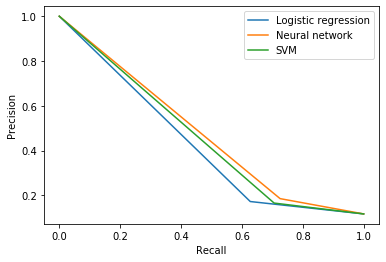

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier  
from sklearn.svm import SVC  

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)
imp_median_X = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
X_train = imp_median_X.transform(X_train)
X_test = imp_median_X.transform(X_test)

imp_median_y = SimpleImputer(missing_values=np.nan, strategy='median').fit(y_train)
y_train = imp_median_y.transform(y_train)
y_test = imp_median_y.transform(y_test)

# fit scaler and scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# downsample for the logistic regression model
sampled_indexes = downsample(y_train)
v = new_training_set(X_train_scaled, y_train, sampled_indexes)
X_train_down = v[0]
y_train_down = v[1]

# # train all models
# logreg = LogisticRegression(C=0.1, solver='liblinear').fit(X_train_down,y_train_down.ravel())
# mlp = MLPClassifier(max_iter=10000, hidden_layer_sizes=[100,100,100], activation='relu').fit(X_train_scaled, y_train.ravel())
# svc = SVC(C=10, kernel='sigmoid', gamma='scale').fit(X_train_scaled, y_train.ravel())

# train all models
logreg = LogisticRegression(C=0.1, solver='liblinear').fit(X_train_down,y_train_down.ravel())
mlp = MLPClassifier(max_iter=10000, hidden_layer_sizes=[100,100,100], activation='relu').fit(X_train_down, y_train_down.ravel())
svc = SVC(C=0.1, kernel='sigmoid', gamma='scale').fit(X_train_down, y_train_down.ravel())

pred_logreg = logreg.predict(X_test_scaled)
pred_mlp = mlp.predict(X_test_scaled)
pred_svc = svc.predict(X_test_scaled)
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, pred_logreg)
precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y_test, pred_mlp)
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, pred_svc)

plt.plot(recall_logreg, precision_logreg)
plt.plot(recall_mlp, precision_mlp)
plt.plot(recall_svc, precision_svc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Logistic regression', 'Neural network', 'SVM', 'predicted mean'], loc = 'upper right')


<span style="color:blue">**We found out, after running the plot several times with different train/test sets, the SVM outperformed the linear and neural network model most of the time. Especially on the recall, SVM seems to generate the highest scores, whilst not giving in on the precision compared to the others either. Therefore, since the SVM shows the most steady results, we think it is the best model of the three in this case. 
**</span>